# Content:
1. [Lagrange interpolating polynomial](#1.-Lagrange-interpolating-polynomial)
2. [Runge's curse and overfitting](#2.-Runge's-curse-and-overfitting)

## 1. Lagrange interpolating polynomial 

![board%20work%20-28.jpg](boardwork/board%20work%20-28.jpg)
![board%20work%20-29.jpg](boardwork/board%20work%20-29.jpg)

Let's code it up!

In [37]:
import numpy as np
def L_Dk(k,x_data,x):
    D=len(x_data)
    val=1.0
    for i in range(0,D):
        if i != k:
            val=val*(x-x_data[i])/(x_data[k]-x_data[i])  #NOTE: product
    return(val)
    
def Lagrange_poly(x_data,y_data,x):
    D=len(x_data)
    val=0
    for k in range(0,D):
        val=val+y_data[k]*L_Dk(k,x_data,x) #NOTE: sum
    return(val)

#=== Let's try a simple example of a line passing through (0,0) and (1,1)
x_data=np.array([0,1])
y_data=np.array([0,1])

#=== make 'x' continuous using grids
x_i=-2.0
x_f=2.0
dx=0.5
x=np.arange(x_i, x_f+dx, dx, float)

N_grids=len(x)

for i_grids in range(N_grids):
    print(x[i_grids],Lagrange_poly(x_data,y_data,x[i_grids]))

-2.0 -2.0
-1.5 -1.5
-1.0 -1.0
-0.5 -0.5
0.0 0.0
0.5 0.5
1.0 1.0
1.5 1.5
2.0 2.0


## 2. Runge's curse and overfitting

[Runge's phenomenon](https://en.wikipedia.org/wiki/Runge%27s_phenomenon) corresponds to the oscillation of a polynomials of high degree obtained using polynomial interpolation. The data used in the previous lecture 'data/fit_01.csv' shows how this works!

In [35]:
import numpy as np

#=== Read the data from a file
myfile=open('data/fit_01.csv','r')

x_data=np.array([])
y_data=np.array([])

iline=0
for line in myfile:
    if iline > 0:            # i == 0 corresponds to the heading
        string=line.split(',')  # csv, comma separated values
        valx=eval(string[0])
        valy=eval(string[1])
        x_data=np.append(x_data,[valx])
        y_data=np.append(y_data,[valy])
        
    iline=iline+1
myfile.close() 

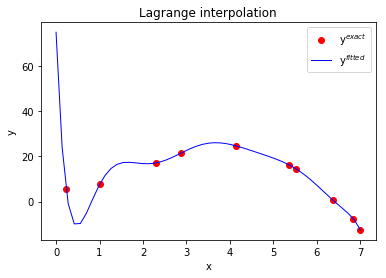

In [36]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(x_data,y_data,'o',color='r',linewidth=1,label='y$^{exact}$')

x_min=0.0
x_max=7.0
N_grids=51

xgrids=np.linspace(x_min, x_max, N_grids)

ygridsfit=np.zeros(N_grids)

for i_grids in range(N_grids):
    ygridsfit[i_grids]=Lagrange_poly(x_data,y_data,xgrids[i_grids])
    #print(xgrids[i_grids],ygridsfit[i_grids])

plt.plot(xgrids,ygridsfit,'-',color='b',linewidth=1,label='y$^{fitted}$')

plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.title('Lagrange interpolation')

#plt.savefig('poly_interpolation.png')  

#=== display
plt.show()

Note that the polynomial seems to be smooth in the region [2,7] but for $x<2$ it oscillates. We say that the polynomial is [overfitted](https://en.wikipedia.org/wiki/Overfitting) in the region [2,7], hence on the left side the interpolated function's behavious is unpreditable.